North Carolina CO-OPS water-level stations: 85

     id                                  name    lat     lon  years_operation  has_wind
8658120                            Wilmington 34.227 -77.953            118.0     False
8656483             Beaufort, Duke Marine Lab 34.717 -76.671             61.6     False
8652587                   Oregon Inlet Marina 35.796 -75.548             51.4     False
8652226                       JENNETTE'S PIER 35.910 -75.592             51.3     False
8655151                          CEDAR ISLAND 35.019 -76.314             48.1     False
8653215               RODANTHE, PAMLICO SOUND 35.595 -75.472             48.1     False
8651370                                  Duck 36.183 -75.747             48.1     False
8654400            Cape Hatteras Fishing Pier 35.223 -75.635             45.3     False
8656467                        Spooners Creek 34.725 -76.803             38.9     False
8659897                          Sunset Beach 33.865 -78.507            

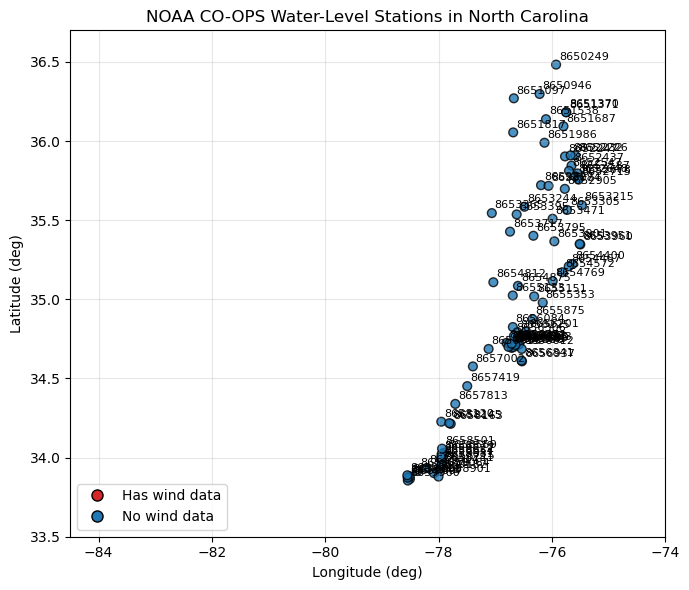

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# ============================================================
# INPUT
# ============================================================
INV_CSV = "coops_waterlevel_station_inventory.csv"

# Rough NC bounding box (for plotting context)
NC_BOUNDS = dict(
    lon_min=-84.5,
    lon_max=-74.0,
    lat_min=33.5,
    lat_max=36.7,
)

# ============================================================
# LOAD INVENTORY
# ============================================================
df = pd.read_csv(INV_CSV)

# Ensure numeric lat/lon
df["lat"] = pd.to_numeric(df["lat"], errors="coerce")
df["lon"] = pd.to_numeric(df["lon"], errors="coerce")

# Filter North Carolina stations
nc = df[df["state"] == "NC"].copy()

# Sort by years of operation (longest first)
nc = nc.sort_values("years_operation", ascending=False)

print(f"North Carolina CO-OPS water-level stations: {len(nc)}\n")

# Display a concise table
cols = ["id", "name", "lat", "lon", "years_operation", "has_wind"]
print(
    nc[cols]
    .round({"lat": 3, "lon": 3, "years_operation": 1})
    .to_string(index=False)
)

# ============================================================
# SIMPLE MAP
# ============================================================
plt.figure(figsize=(7, 6))

# Plot all NC stations
plt.scatter(
    nc["lon"], nc["lat"],
    s=40,
    c=nc["has_wind"].map({True: "tab:red", False: "tab:blue"}),
    edgecolor="k",
    alpha=0.8,
    label=None
)

# Annotate station IDs (optional but useful)
for _, r in nc.iterrows():
    plt.text(
        r["lon"] + 0.05,
        r["lat"] + 0.03,
        r["id"],
        fontsize=8
    )

plt.xlim(NC_BOUNDS["lon_min"], NC_BOUNDS["lon_max"])
plt.ylim(NC_BOUNDS["lat_min"], NC_BOUNDS["lat_max"])

plt.xlabel("Longitude (deg)")
plt.ylabel("Latitude (deg)")
plt.title("NOAA CO-OPS Water-Level Stations in North Carolina")

# Legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker="o", color="w", label="Has wind data",
           markerfacecolor="tab:red", markeredgecolor="k", markersize=8),
    Line2D([0], [0], marker="o", color="w", label="No wind data",
           markerfacecolor="tab:blue", markeredgecolor="k", markersize=8),
]
plt.legend(handles=legend_elements, loc="lower left")

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
